### Please provide your own S3 bucket below. The name for your bucket must contain the prefix ‘deeplens’. In this example, the bucket is ‘deeplens-imageclassification’. Make Sure S3 bucket name is unique, e.g. deeplens-imageclassfication-name-date

In [3]:
bucket='deeplens-imageclassification-matthew'

In [4]:
%%time 
import pickle
import os 
import urllib.request
import boto3


def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

training_params=load_obj("training_params")
job_name=training_params["TrainingJobName"]
print(job_name)
# create the Amazon SageMaker training job
sagemaker = boto3.client(service_name='sagemaker')
sagemaker.create_training_job(**training_params)

# confirm that the training job has started
status = sagemaker.describe_training_job(TrainingJobName=job_name)['TrainingJobStatus']
print('Training job current status: {}'.format(status))

try:
    # wait for the job to finish and report the ending status
    sagemaker.get_waiter('training_job_completed_or_stopped').wait(TrainingJobName=job_name)
    training_info = sagemaker.describe_training_job(TrainingJobName=job_name)
    status = training_info['TrainingJobStatus']
    print("Training job ended with status: " + status)
except:
    print('Training failed to start')
     # if exception is raised, that means it has failed
    message = sagemaker.describe_training_job(TrainingJobName=job_name)['FailureReason']
    print('Training failed with the following error: {}'.format(message))

DEMO-imageclassification-2020-05-11-11-42-38
Training job current status: InProgress
Training job ended with status: Completed
CPU times: user 83.7 ms, sys: 5.49 ms, total: 89.2 ms
Wall time: 6min


## Debug: If you have error like ....
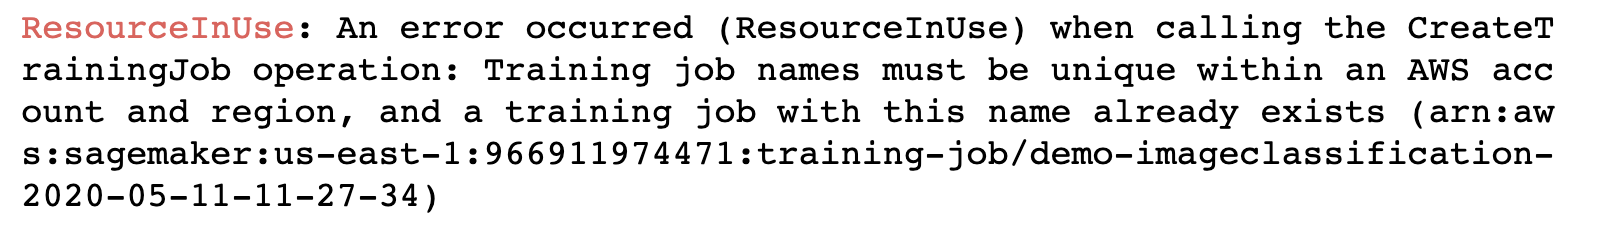

* Solution: Please run 02_Training_Config to create a new config
